# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier as KNN

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")


# Reading the data file

In [2]:
# read data file 
df = pd.read_csv("magic04.data", header=None)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [3]:
#counts for each class
x = df.drop(columns=10)
y = df[10]
y.value_counts()

10
g    12332
h     6688
Name: count, dtype: int64

# Removing duplicates from the data file and Encoding into 0's and 1's

In [4]:
#Removing duplicate data
df.duplicated().sum()
df=df.drop_duplicates()

In [5]:
#encoding the the non-numeric data into 0's and 1's, i.e(g = 0 and h = 1)
le=preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Target Distribution before balancing')

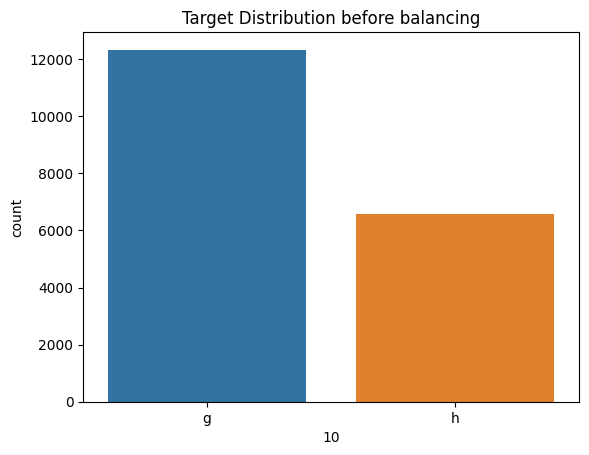

In [6]:
#Check the distributaion of Target variable.
sns.countplot(x=10, data=df,)
plt.title('Target Distribution before balancing')

In [7]:
#Balancing data
resampler = RandomUnderSampler(random_state=42)
x, y = resampler.fit_resample(x, y)
pd.DataFrame(y).value_counts()


0    6688
1    6688
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Distribution after balancing')

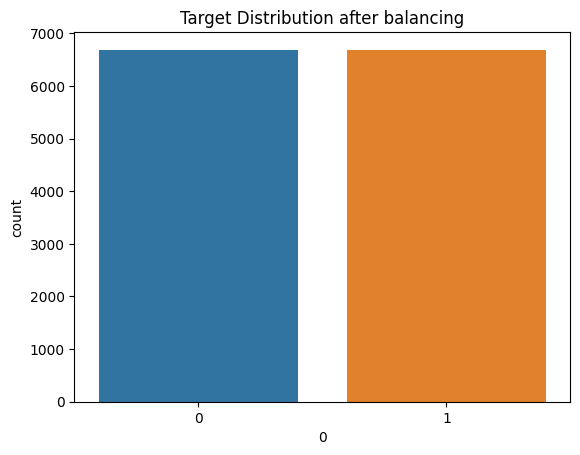

In [8]:
sns.countplot(x=0, data=pd.DataFrame(y),)
plt.title('Target Distribution after balancing')

# Normalizing the data

In [9]:
#Plot function
def plot_features(x, y, y2=None, n_features=2):
    fig, ax = plt.subplots(1, n_features, sharey=True)

    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y)

    if y2 is not None:
        for i in range(len(ax)):
            ax[i].scatter(x[:, i], y2, color='red', facecolors="none")


    fig.set_figwidth(20)
    fig.set_figheight(7)

    ax[0].set_ylabel("price")

In [10]:
# turn to np arrays and normalize y
x = np.array(x)
y = np.array(y)

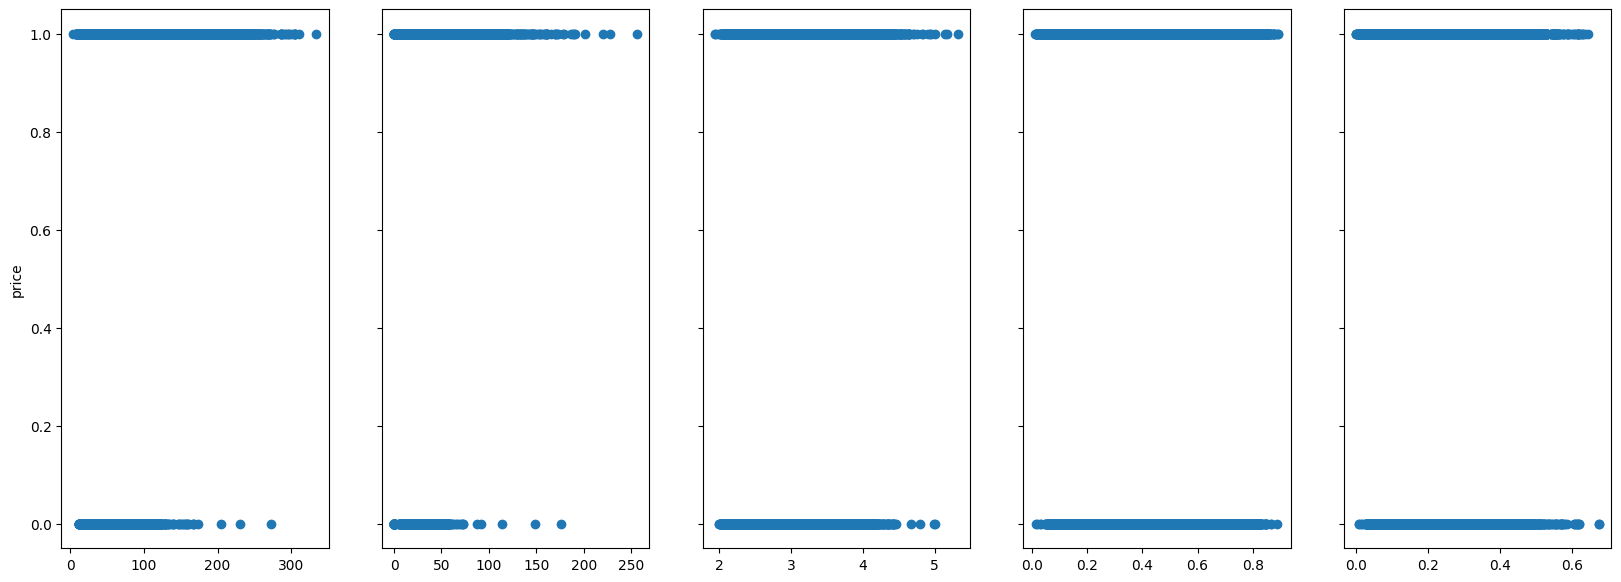

In [11]:
#Plot before normalize
plot_features(x, y, n_features=5)

In [12]:
# normalize data
scaler = StandardScaler()
x = scaler.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,13376.000000,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,13376.000000,13376.000000,13376.000000,13376.000000,1.337600e+04
mean,0.000000,1.699863e-17,-1.138908e-15,2.974760e-17,1.338642e-16,0.000000,0.000000,0.000000,0.000000,4.249658e-18
std,1.000037,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037,1.000037,1.000037,1.000037,1.000037e+00
min,-1.127508,-1.133850e+00,-1.892575e+00,-1.985823e+00,-1.913371e+00,-6.881124,-6.013030,-8.884994,-1.165906,-2.540439e+00
25%,-0.695597,-5.725646e-01,-7.321727e-01,-7.894450e-01,-7.817974e-01,-0.257698,-0.397603,-0.484783,-0.895471,-6.885832e-01
50%,-0.396412,-3.134357e-01,-1.855942e-01,-1.267208e-01,-1.521529e-01,0.158529,0.126236,-0.010683,-0.295185,-2.493378e-02
75%,0.403141,1.177649e-01,5.797416e-01,6.862462e-01,6.507554e-01,0.478232,0.491079,0.465791,0.782802,6.290579e-01
max,5.887093,1.113860e+01,5.214415e+00,2.791003e+00,4.114246e+00,8.909961,4.091646,7.741114,2.170920,3.932278e+00


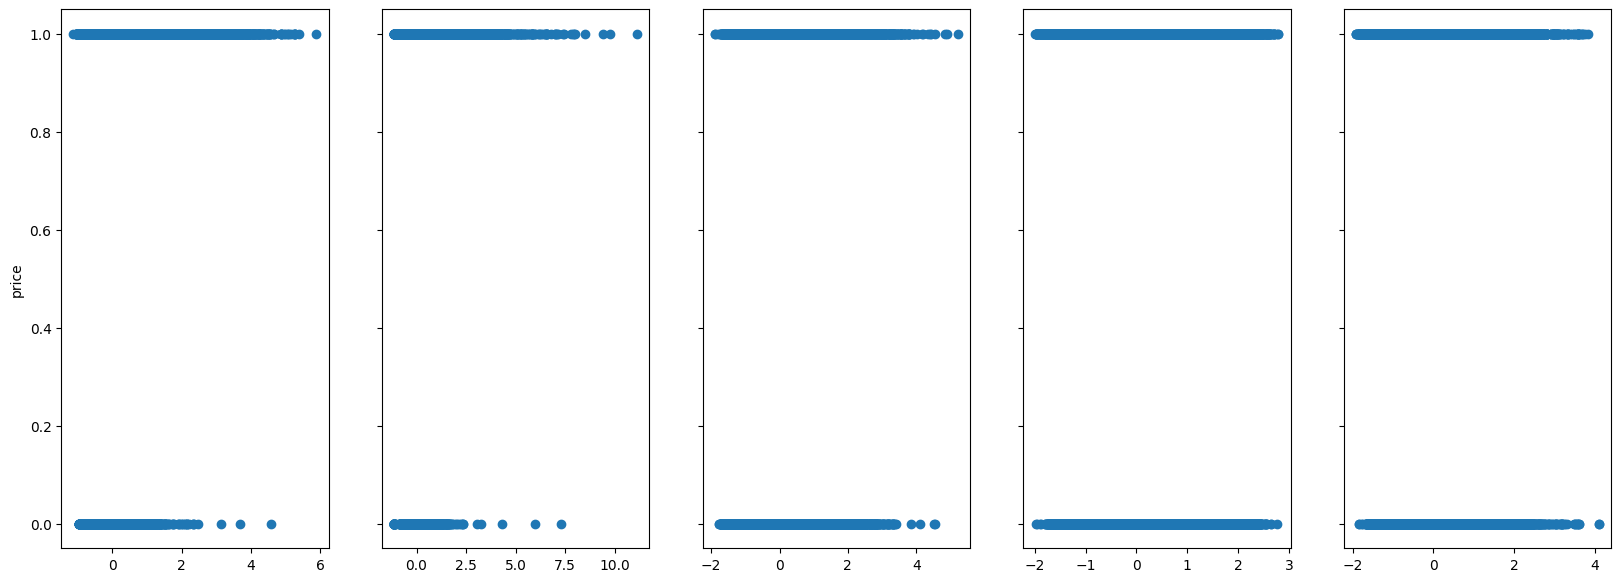

In [13]:
#Plot after normalize
plot_features(x, y, n_features=5)

# Training the data using model and evaluate the performance

In [14]:
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.3, random_state=0)

# Logistic Regression Model

In [15]:
# Logistic Regression Model
model = LogReg()
params = {
    "penalty": [None, "l2"],
    "C": [0.01, 0.1, 1, 10, 50, 100]
}

lg_cv = GridSearchCV(model, param_grid=params, cv=10, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")
lg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'penalty': [None, 'l2']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [16]:
result = pd.DataFrame(lg_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.013612,0.001405,0.005026,0.000278,0.01,None,"{'C': 0.01, 'penalty': None}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
1,0.011108,0.000467,0.005037,0.000348,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.763074,0.792956,0.791889,...,0.791262,0.803241,0.804348,0.779703,0.830808,0.812808,0.785542,0.804705,0.016052,1
2,0.012944,0.000937,0.005037,0.000150,0.1,None,"{'C': 0.1, 'penalty': None}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
3,0.012320,0.000827,0.005132,0.000463,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.796163,0.799076,0.799523,0.774818,0.818859,0.810680,0.785203,0.801767,0.014533,2
4,0.012611,0.001130,0.005134,0.000339,1,None,"{'C': 1, 'penalty': None}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
5,0.013857,0.002457,0.005492,0.000719,1,l2,"{'C': 1, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.817284,0.809639,0.784689,0.800625,0.014551,3
6,0.014098,0.001505,0.005237,0.000392,10,None,"{'C': 10, 'penalty': None}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
7,0.013488,0.001207,0.005412,0.000468,10,l2,"{'C': 10, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
8,0.012630,0.000683,0.005482,0.000672,50,None,"{'C': 50, 'penalty': None}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4
9,0.013281,0.001047,0.005162,0.000322,50,l2,"{'C': 50, 'penalty': 'l2'}",0.763074,0.796158,0.792956,...,0.792771,0.802784,0.795724,0.774272,0.815271,0.809639,0.784689,0.800423,0.014331,4


In [17]:
selected_results = result[["param_penalty", "param_C", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
selected_results

,param_penalty,param_C,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,None,0.01,0.772826,0.800423,0.759122,0.722055
1,l2,0.01,0.772719,0.804705,0.757386,0.715596
2,None,0.1,0.772826,0.800423,0.759122,0.722055
3,l2,0.1,0.773467,0.801767,0.759607,0.721839
4,None,1,0.772826,0.800423,0.759122,0.722055
5,l2,1,0.772932,0.800625,0.759210,0.722055
6,None,10,0.772826,0.800423,0.759122,0.722055
7,l2,10,0.772826,0.800423,0.759122,0.722055
8,None,50,0.772826,0.800423,0.759122,0.722055
9,l2,50,0.772826,0.800423,0.759122,0.722055


In [18]:
lg_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

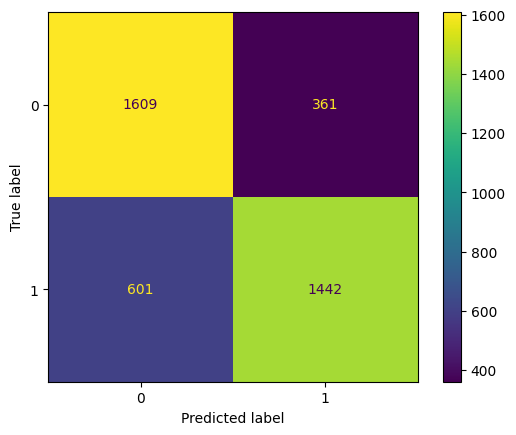

In [19]:
lg_prediction = lg_cv.best_estimator_.predict(x_eval)
m = confusion_matrix(y_eval, lg_prediction)
cm = ConfusionMatrixDisplay(m)
cm.plot()

In [20]:
print(classification_report(y_eval, lg_prediction))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1970
           1       0.80      0.71      0.75      2043

    accuracy                           0.76      4013
   macro avg       0.76      0.76      0.76      4013
weighted avg       0.76      0.76      0.76      4013



# K-NN Model

In [21]:
#KNN Model
knn_model = KNN()

params = {
    "n_neighbors": list(range(3,20,2))
}
knn_cv = GridSearchCV(knn_model, param_grid=params, cv=10, return_train_score=True, scoring=["accuracy", "f1", "recall", "precision"], refit="accuracy")

In [22]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             refit='accuracy', return_train_score=True,
             scoring=['accuracy', 'f1', 'recall', 'precision'])

In [23]:
knn_result = pd.DataFrame(knn_cv.cv_results_)
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision
0,0.009277,0.001027,0.079333,0.009548,3,{'n_neighbors': 3},0.769477,0.789755,0.808965,0.798077,...,0.919271,0.922414,0.921584,0.920063,0.926632,0.921155,0.925361,0.922274,0.921609,0.002570
1,0.009148,0.000544,0.079573,0.002708,5,{'n_neighbors': 5},0.784418,0.813234,0.823906,0.803419,...,0.908133,0.910046,0.907447,0.907675,0.913493,0.910246,0.908504,0.907402,0.909085,0.001768
2,0.008988,0.001024,0.083850,0.003990,7,{'n_neighbors': 7},0.784418,0.823906,0.818570,0.814103,...,0.902540,0.902835,0.902225,0.898926,0.905156,0.902694,0.898444,0.901891,0.902264,0.002039
3,0.008590,0.000432,0.086927,0.001467,9,{'n_neighbors': 9},0.787620,0.827108,0.821772,0.815171,...,0.895664,0.892679,0.900168,0.896475,0.901393,0.895949,0.892610,0.901503,0.897325,0.003139
4,0.008531,0.000467,0.087932,0.001152,11,{'n_neighbors': 11},0.783351,0.824973,0.828175,0.811966,...,0.893098,0.891529,0.895405,0.893569,0.897931,0.890036,0.890342,0.896455,0.893851,0.002600
5,0.008249,0.002021,0.089496,0.002310,13,{'n_neighbors': 13},0.799360,0.819637,0.829242,0.810897,...,0.893311,0.890899,0.897348,0.894362,0.895787,0.889487,0.891482,0.892948,0.893719,0.002584
6,0.008605,0.000646,0.094473,0.004082,15,{'n_neighbors': 15},0.799360,0.817503,0.836713,0.806624,...,0.891769,0.890310,0.894061,0.891614,0.896259,0.891923,0.891648,0.896502,0.893288,0.002155
7,0.009404,0.000793,0.097992,0.003363,17,{'n_neighbors': 17},0.794023,0.819637,0.834578,0.800214,...,0.889997,0.890122,0.890607,0.891360,0.893871,0.893193,0.886755,0.893605,0.891914,0.002508
8,0.008804,0.001347,0.097697,0.003754,19,{'n_neighbors': 19},0.794023,0.813234,0.836713,0.797009,...,0.889240,0.890223,0.892117,0.890387,0.892531,0.889681,0.885925,0.889303,0.890716,0.002531


In [24]:
knn_selected_results = knn_result[["param_n_neighbors", "mean_test_accuracy", "mean_test_precision", "mean_test_f1", "mean_test_recall"]]
knn_selected_results

,param_n_neighbors,mean_test_accuracy,mean_test_precision,mean_test_f1,mean_test_recall
0,3,0.795687,0.833491,0.780823,0.734985
1,5,0.804869,0.853819,0.788027,0.731962
2,7,0.808181,0.861838,0.790674,0.730669
3,9,0.810530,0.867284,0.792560,0.730024
4,11,0.808928,0.868618,0.789916,0.724643
5,13,0.811918,0.873474,0.792993,0.726364
6,15,0.812238,0.874555,0.793169,0.725934
7,17,0.809781,0.873140,0.789941,0.721627
8,19,0.809354,0.872971,0.789453,0.720984


In [25]:
knn_cv.best_params_

{'n_neighbors': 15}

In [26]:
knn_prediction = knn_cv.best_estimator_.predict(x_eval)

print(classification_report(y_eval, knn_prediction))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1970
           1       0.89      0.72      0.79      2043

    accuracy                           0.81      4013
   macro avg       0.82      0.81      0.81      4013
weighted avg       0.82      0.81      0.81      4013



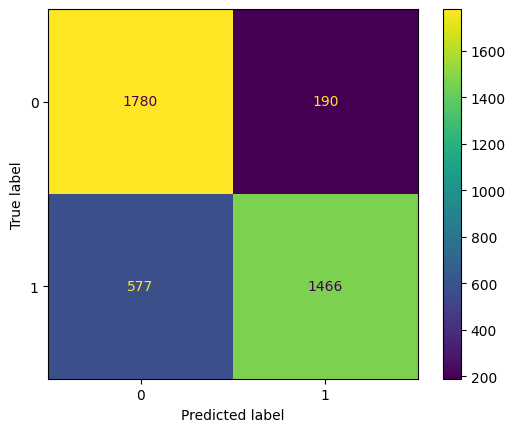

In [27]:
m = confusion_matrix(y_eval, knn_prediction)
p = ConfusionMatrixDisplay(m)
p.plot()